<a href="https://colab.research.google.com/github/ayoub-ait-idir/Titanic-Competition/blob/main/Titanic_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone Repo

In [149]:
! pwd

/content/Titanic-Competition/Titanic-Competition


In [150]:
! git clone https://github.com/ayoub-ait-idir/Titanic-Competition.git

fatal: destination path 'Titanic-Competition' already exists and is not an empty directory.


In [151]:
cd /content/Titanic-Competition

/content/Titanic-Competition


In [152]:
!ls

gender_submission.csv  Titanic-Competition	  train.csv
test.csv	       Titanic_Competition.ipynb


In [153]:
!rm -rf README.md

In [154]:
!ls

gender_submission.csv  Titanic-Competition	  train.csv
test.csv	       Titanic_Competition.ipynb


In [155]:
cd /content/Titanic-Competition/Titanic-Competition

/content/Titanic-Competition/Titanic-Competition


In [156]:
!ls

gender_submission.csv  test.csv		    Titanic_Competition.ipynb
README.md	       Titanic-Competition  train.csv


# Import Packages

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import Data

In [158]:
# import train and test data
train = pd.read_csv('/content/Titanic-Competition/train.csv')
test  = pd.read_csv('/content/Titanic-Competition/test.csv')
gender_submission = pd.read_csv('/content/Titanic-Competition/gender_submission.csv')

In [159]:
# View train Data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
# View test Data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [161]:
# View gender submession Data
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [162]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [163]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [165]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Repetitive Data - Duplicates

In [166]:
# Extraire les lignes dupliquées dans duplicate
duplicate_train = train[train.duplicated()]
duplicate_test = test[test.duplicated()]

print('le pourcentage des lignes dupliquées = {} %'.format(round(len(duplicate_train)/len(train)*100)))
print('le pourcentage des lignes dupliquées = {} %'.format(round(len(duplicate_test)/len(test)*100)))

le pourcentage des lignes dupliquées = 0 %
le pourcentage des lignes dupliquées = 0 %


# Missing Data

## Train

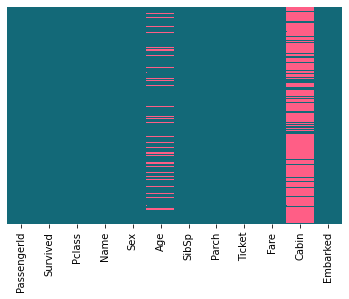

In [167]:
# Heatmap of Missing Values
colours = ['#136978', '#ff5e86']
sns.heatmap(train.isna(), yticklabels=False, cbar=False, cmap=sns.color_palette(colours))

In [168]:
# Calculate the % of missing values in each column 
print('\nles pourcentages importants des valeurs manquantes: ')
#print(df.isna().sum()/len(df))
for col in train.columns:
  pct_missing = np.mean(train[col].isnull())
  rounded_pct = round(pct_missing*100, 2)
  if rounded_pct > 10:
    print('{} - {}%'.format(col, rounded_pct))


les pourcentages importants des valeurs manquantes: 
Age - 19.87%
Cabin - 77.1%


## Test Data

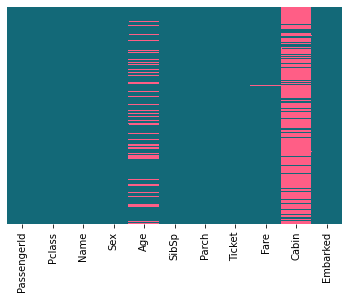

In [169]:
# Heatmap of Missing Values
colours = ['#136978', '#ff5e86']
sns.heatmap(test.isna(), yticklabels=False, cbar=False, cmap=sns.color_palette(colours))

In [170]:
# Calculate the % of missing values in each column 
print('\nles pourcentages importants des valeurs manquantes: ')
#print(df.isna().sum()/len(df))
for col in test.columns:
  pct_missing = np.mean(test[col].isnull())
  rounded_pct = round(pct_missing*100, 2)
  if rounded_pct > 10:
    print('{} - {}%'.format(col, rounded_pct))


les pourcentages importants des valeurs manquantes: 
Age - 20.57%
Cabin - 78.23%


## Handle Missing Data

In [171]:
# Drop Cabin & Imputeage with NaN
train_cabin = train.Cabin
test_cabin = test.Cabin
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

def imputation(df):
  for col in df.columns:
      df[col].fillna(np.nan, inplace=True)

imputation(train);
imputation(test);

# Numeric Vs non-Numeric Data

In [172]:
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
cat_cols1 = ['Survived','Pclass','Sex','Ticket','Embarked']
cat_cols2 = ['Pclass','Sex','Ticket','Embarked']

train_num = train[num_cols]
train_cat = train[cat_cols1]

test_num = test[num_cols]
test_cat = test[cat_cols2]

# Outliers

## Train

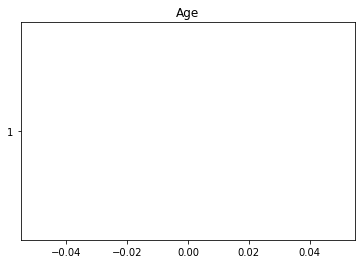

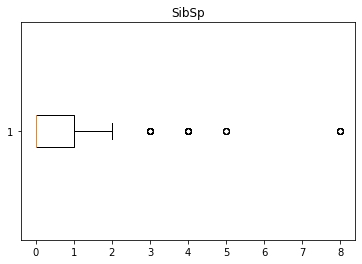

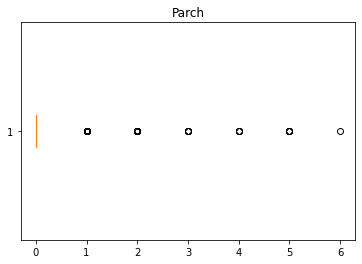

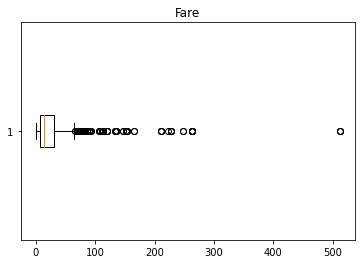

In [173]:
for i in train_num.columns:
  plt.boxplot(train[i], vert=False)
  plt.title(i)
  plt.show()

In [174]:
# Handle outliers in train data
# IQR: Interquartile Range Method
rows_to_drop = []
for col in train_num.columns[1:]:
  train = train.sort_values(by=[col])
  q1 = train[col].quantile(0.01)
  q3 = train[col].quantile(0.99)
  iqr = q3 - q1
  lower_whisker = q1 - 1.5*iqr
  upper_whisker = q3 + 1.5*iqr
  l = len(train)
  for i in range(0, l):
    if (train.loc[train.index[i], col]>upper_whisker) | (train.loc[train.index[i], col]<lower_whisker):
      train.loc[train.index[i], col] = np.nan

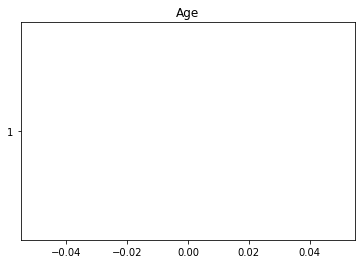

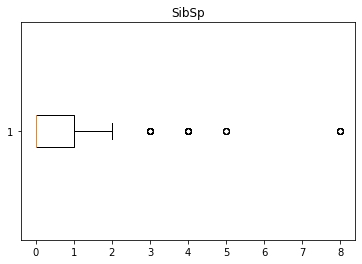

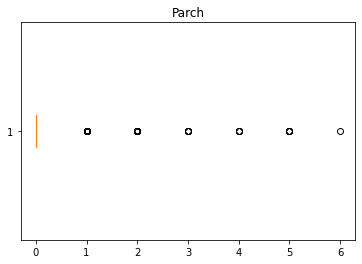

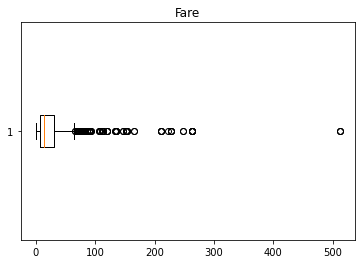

In [175]:
for i in train_num.columns:
  plt.boxplot(train[i], vert=False)
  plt.title(i)
  plt.show()

## Test

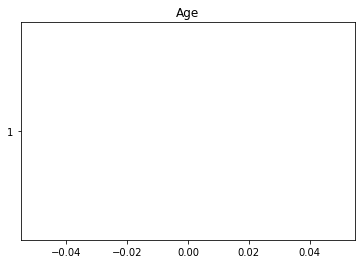

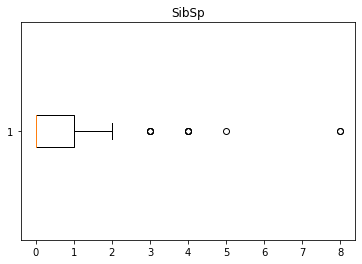

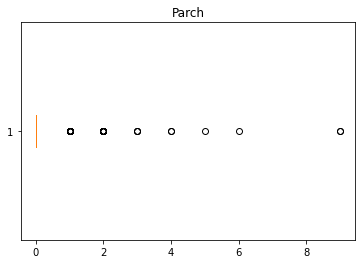

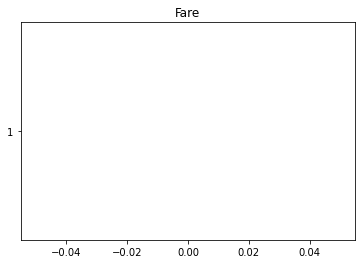

In [176]:
for i in test_num.columns:
  plt.boxplot(test[i], vert=False)
  plt.title(i)
  plt.show()

In [177]:
# Handle outliers in test data
# IQR: Interquartile Range Method
rows_to_drop = []
for col in test_num.columns[1:]:
  test = test.sort_values(by=[col])
  q1 = test[col].quantile(0.01)
  q3 = test[col].quantile(0.99)
  iqr = q3 - q1
  lower_whisker = q1 - 1.5*iqr
  upper_whisker = q3 + 1.5*iqr
  l = len(test)
  for i in range(0, l):
    if (test.loc[test.index[i], col]>upper_whisker) | (test.loc[test.index[i], col]<lower_whisker):
      train.loc[test.index[i], col] = np.nan

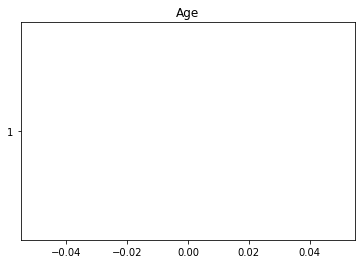

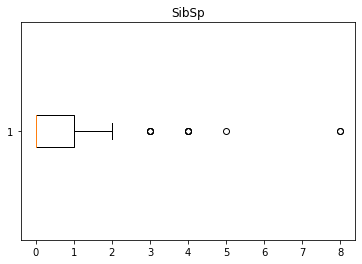

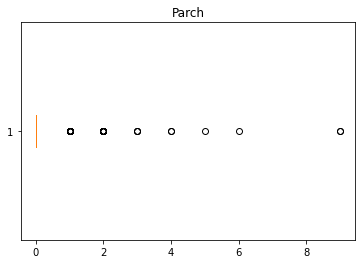

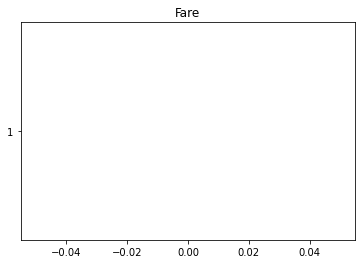

In [178]:
for i in test_num.columns:
  plt.boxplot(test[i], vert=False)
  plt.title(i)
  plt.show()

# Feature Ecoding

Encode Categorical columns to Numerical ones so that we use them in our ML model

In [179]:
train_cat.head()

,Survived,Pclass,Sex,Ticket,Embarked
0,0,3,male,A/5 21171,S
1,1,1,female,PC 17599,C
2,1,3,female,STON/O2. 3101282,S
3,1,1,female,113803,S
4,0,3,male,373450,S


In [180]:
test_cat.head()

,Pclass,Sex,Ticket,Embarked
0,3,male,330911,Q
1,3,female,363272,S
2,2,male,240276,Q
3,3,male,315154,S
4,3,female,3101298,S


In [181]:
from sklearn import preprocessing

cols = ['Sex','Ticket','Embarked']
le = preprocessing.LabelEncoder()

for col in cols:
  train_cat.dropna(inplace=True)
  le.fit(train_cat[col])
  train_cat[col] = le.transform(train_cat[col])

In [182]:
for col in cols:
  le.fit(test_cat[col])
  test_cat[col] = le.transform(test_cat[col])

In [183]:
train_cat.head()

,Survived,Pclass,Sex,Ticket,Embarked
0,0,3,1,522,2
1,1,1,0,595,0
2,1,3,0,668,2
3,1,1,0,48,2
4,0,3,1,471,2


In [184]:
test_cat.head()

,Pclass,Sex,Ticket,Embarked
0,3,1,152,1
1,3,0,221,2
2,2,1,73,1
3,3,1,147,2
4,3,0,138,2


# Merge Data

In [188]:
train_df = train_cat.merge(train_num, left_index=True, right_index=True)
train_df.head()

,Survived,Pclass,Sex,Ticket,Embarked,Age,SibSp,Parch,Fare
0,0,3,1,522,2,22.0,1,0,7.2500
1,1,1,0,595,0,38.0,1,0,71.2833
2,1,3,0,668,2,26.0,0,0,7.9250
3,1,1,0,48,2,35.0,1,0,53.1000
4,0,3,1,471,2,35.0,0,0,8.0500


In [189]:
test_df = test_cat.merge(test_num, left_index=True, right_index=True)
test_df.head()

,Pclass,Sex,Ticket,Embarked,Age,SibSp,Parch,Fare
0,3,1,152,1,34.5,0,0,7.8292
1,3,0,221,2,47.0,1,0,7.0000
2,2,1,73,1,62.0,0,0,9.6875
3,3,1,147,2,27.0,0,0,8.6625
4,3,0,138,2,22.0,1,1,12.2875


# Visualize target column by other columns

## Survived Column

In [ ]:
# Target column "Survived"
sns.countplot(x='Survived', data=train)

In [ ]:
# Percentage of people who survived
train.Survived.sum()/train.Survived.count()

## By Gender

In [ ]:
# The difference between men and women 
train.groupby(['Survived','Sex'])['Survived'].count()

In [ ]:
sns.catplot(x='Sex', col='Survived', kind='count', data=train)

In [ ]:
# % of survival by gender
print("% of women survived: " , 
      train[train.Sex == 'female'].Survived.sum()/train[train.Sex == 'female'].Survived.count())

print("% of men survived:   " , 
      train[train.Sex == 'male'].Survived.sum()/train[train.Sex == 'male'].Survived.count())

In [ ]:
f,ax=plt.subplots(1,2,figsize=(16,7))
train['Survived'][train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],
                                              autopct='%1.1f%%',ax=ax[0],shadow=True)
train['Survived'][train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],
                                              autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

Women are more likely to survive than men
  74% of women survived while only 19% of men did

## By Pclass

In [ ]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

In [ ]:
print("% of survivals in") 
print("Pclass=1 : ", train.Survived[train.Pclass == 1].sum()/train[train.Pclass == 1].Survived.count())
print("Pclass=2 : ", train.Survived[train.Pclass == 2].sum()/train[train.Pclass == 2].Survived.count())
print("Pclass=3 : ", train.Survived[train.Pclass == 3].sum()/train[train.Pclass == 3].Survived.count())

In [ ]:
sns.catplot('Pclass','Survived', kind='point', data=train);

## Class & Gender

In [ ]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died

In [ ]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=train);

## Embarked

In [ ]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=train);

Survival rate are lowest for S and highest for C

In [ ]:
sns.catplot('Embarked','Survived', kind='point', data=train);

In [ ]:
# Embarked and Sex
sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=train);

In [ ]:
# Gender, Pclass and Embarked
pd.crosstab([train.Survived], [train.Sex, train.Pclass, train.Embarked], margins=True)

## SibSp

In [ ]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20,10), use_bin_df=False):
  '''
  This function creates count and distribution Visualistion between chosed columns
  '''
  if use_bin_df:
    fig = plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    sns.distplot(data.loc[data[label_column]==1][target_column],
                kde_kws={'label':'Survived'});
    sns.distplot(data.loc[data[label_column]==0][target_column],
                kde_kws={'label':'Did not survive'});
    
  else:
    fig = plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    sns.countplot(y=target_column, data=data);
    plt.subplot(1, 2, 2)
    sns.distplot(data.loc[data[label_column]==1][target_column],
                kde_kws={'label':'Survived'});
    sns.distplot(data.loc[data[label_column]==0][target_column],
                kde_kws={'label':'Did not survive'});

# Fill Age' Missing Values with Mean

In [ ]:
train['Age'].fillna(train.Age.mean(), inplace=True)
test['Age'].fillna(test.Age.mean(), inplace=True)

# Data Wrangling